In [94]:
#Import librairies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import PIL
import PIL.Image
from PIL import Image
import tensorflow as tf
from tqdm import tqdm


In [95]:
executant = input(str('Qui execute ce notebook ? Arthur, Aurelie, Ludovic ou Virginie'))
print('executant = {}'.format(executant))

if executant == 'Arthur':
    df = pd.read_csv('Dataframe/Arthur/df_cleaned_arthur.csv')
elif executant == 'Aurelie':
    df = pd.read_csv('Dataframe/Aurelie/df_cleaned_aurelie.csv')
elif executant == 'Ludovic':
    df = pd.read_csv('Dataframe/Ludovic/df_cleaned_ludovic.csv')
elif executant == 'Virgine':
    df = pd.read_csv('Dataframe/Virginie/df_cleaned_virgine.csv')

display(df.head())

executant = Arthur


,Path,target
0,/Users/arthurnicolas/Desktop/Code/Projet DataS...,BAS
1,/Users/arthurnicolas/Desktop/Code/Projet DataS...,BAS
2,/Users/arthurnicolas/Desktop/Code/Projet DataS...,BAS
3,/Users/arthurnicolas/Desktop/Code/Projet DataS...,BAS
4,/Users/arthurnicolas/Desktop/Code/Projet DataS...,BAS


# 4. Visualisation des données

## 4.1. Répartition du nombre d'images par classes

Text(0.5, 1.0, "Nombres d'images par classe")

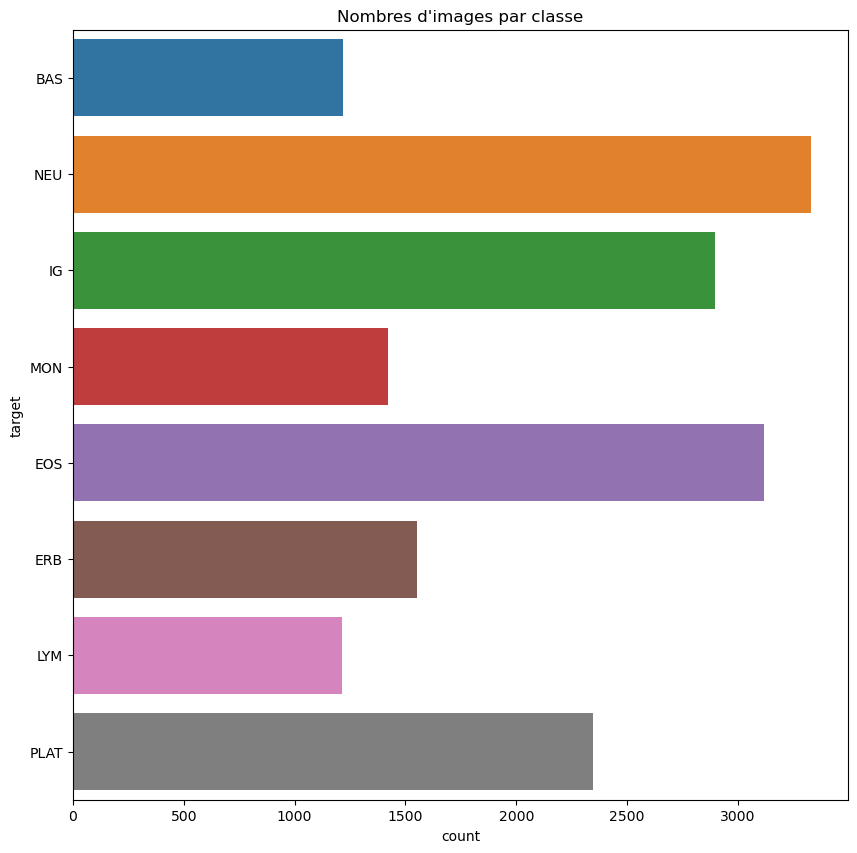

In [45]:
plt.figure(figsize=(10,10))
sns.countplot(data = df, y = 'target')
plt.title("Nombres d'images par classe")

On observe un déséquilibre entre les différentes classes

## 4.2. Visualisation de 9 images par classe

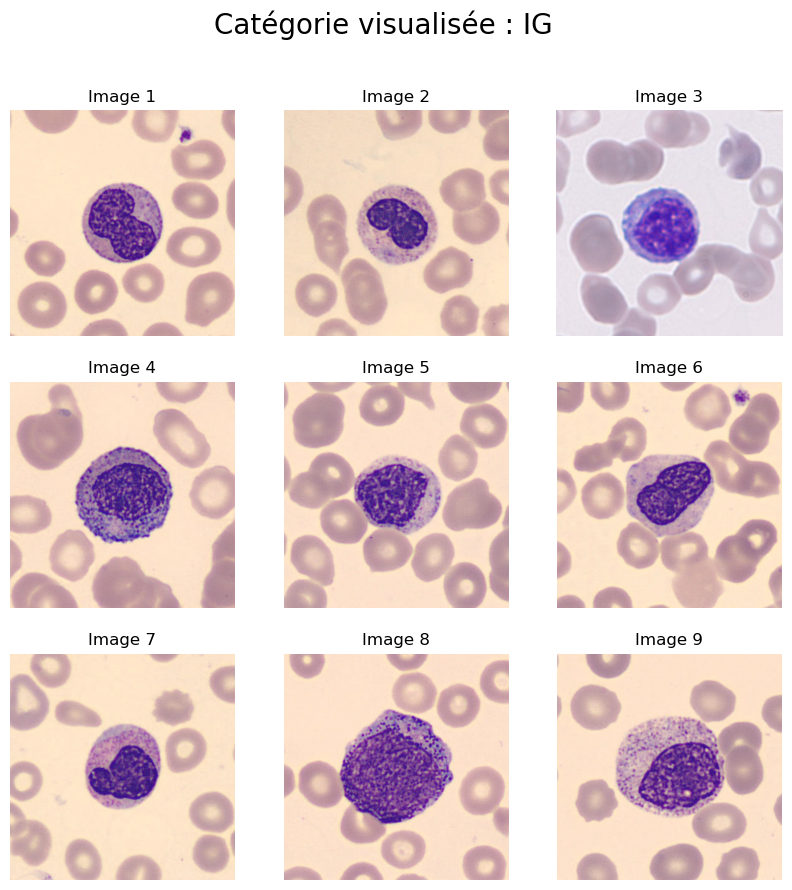

In [46]:
category = "IG"  # a modifier par la catégorie visée
subset = df[df["target"] == category].sample(n=9)

#création de la figure
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(10, 10))

# boucle for
for i, ax in enumerate(axs.flat):
    # chargement image
    img = Image.open(subset.iloc[i]["Path"])
    # Plot image
    ax.imshow(img)
    ax.set_axis_off()
    ax.set_title(f"Image {i+1}")
    plt.suptitle("Catégorie visualisée : {}".format(category), fontsize=20)


# Visualisation
plt.show()

## 4.3. Affichage d'une image aléatoire pour chaque label du dataset

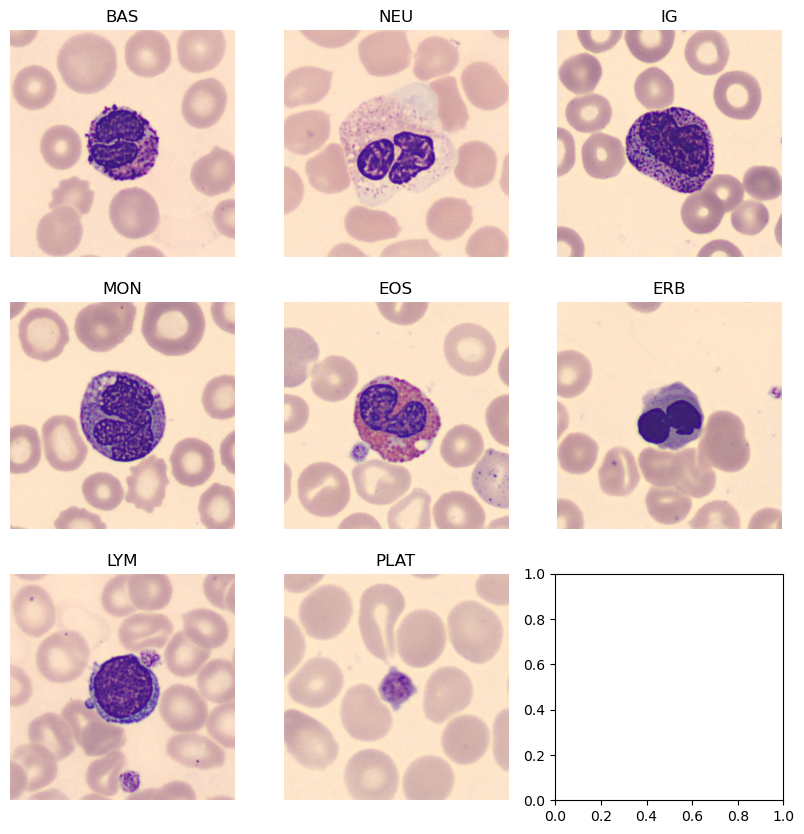

In [47]:
list_category = df.target.unique()

#création de la figure
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(10, 10))

for i, category in enumerate(list_category):
    subset = df[df["target"] == category].sample(n=1)
    image_path = subset["Path"].values[0]
    
    # Load and plot the image
    image = Image.open(image_path)
    ax = axs[i // 3, i % 3]
    ax.imshow(image)
    ax.set_title(category)
    ax.axis("off")

plt.show()

## 4.4. Affichage d'une image moyenne pour chaque label du dataset

8it [00:33,  4.17s/it]


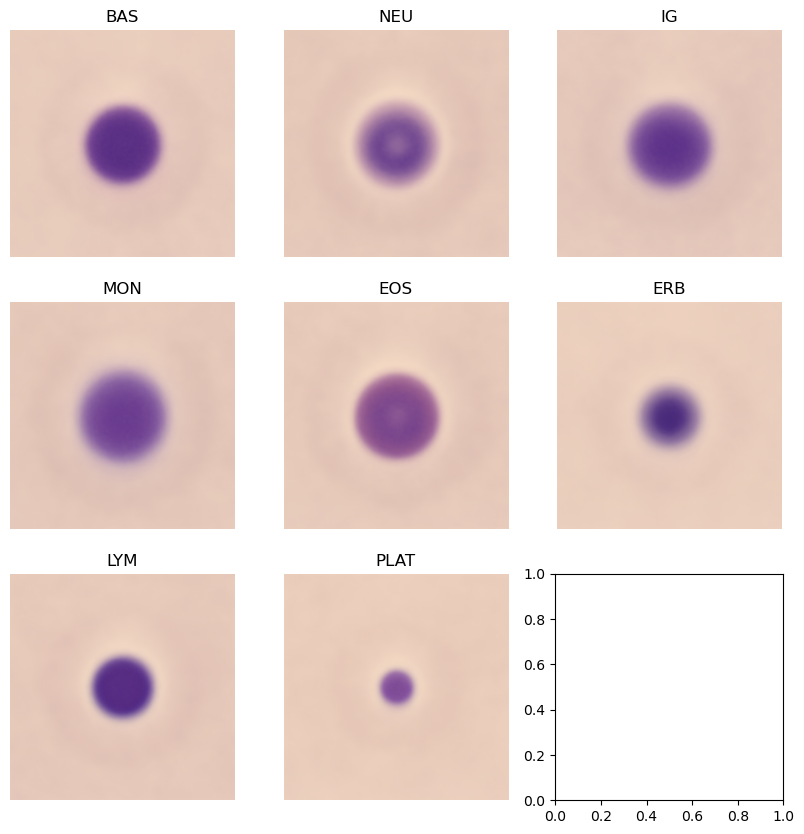

In [84]:
list_category = df.target.unique()

#création de la figure
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(10, 10))

for category, ax in tqdm(zip(list_category, axs.flatten())):
    subset = df['Path'][df["target"] == category].sample(n=1000)
    liste = []

    for path in subset:
        #lecture du fichier
        im = tf.io.read_file(path)
        # On décode le fichier
        im = tf.image.decode_jpeg(im, channels=3)
        # On uniformise la taille des images
        im = tf.image.resize(im, size=(363, 360))
        # Ajout à la liste
        liste.append(im)

    liste = np.array(liste)
    image_moyenne = np.mean(liste, axis=0)
    
    # Load and plot the image
    ax.imshow(image_moyenne/255)
    ax.set_title(category)
    ax.axis('off')

plt.show()

# **5. Représentation graphique du dataset**

## 5.1. Préparation des données.

### 5.1.1. création d'une liste 'X' comprenant l'ensemble des images au format 32 x 32 x 3

In [86]:
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.manifold import LocallyLinearEmbedding, MDS, Isomap, TSNE

# création d'une colonne de df associant à chaque target une valeur comprise entre 0 et 7
df['label'] = df['target'].replace(df.target.unique(), [*range(len(df.target.unique()))])

X_path=df.Path
Y_label=df.label
Y_nameLabel=df.target

X = []

for filepath in tqdm(X_path):
    # Lecture du fichier
    im = tf.io.read_file(filepath)
    # On décode le fichier
    im = tf.image.decode_jpeg(im, channels=3)
    # Redimensionnement
    im = tf.image.resize(im, size=(32, 32))
    X.append(np.array(im))
        
print(type(X))  
print(type(Y_nameLabel))

100%|██████████| 17092/17092 [00:34<00:00, 492.42it/s]

<class 'list'>
<class 'pandas.core.series.Series'>


In [87]:
#Transformation de la série en array numpy
X=np.array(X)

#Convsersion des données en type 'float32'
X = X.astype('float32')

#Normalisation des balances RGB
X/= 255.0

#Transformation de la colonne du dataframe comprenant la classe des images en array numpy
Y_nameLabel = np.array(Y_nameLabel)

#Vérification de l'ensemble des modifications faites:
print(type(X))
print(X.shape)
print(type(Y_nameLabel))
print('Min: %.3f, Max: %.3f' % (X.min(), X.max()))

<class 'numpy.ndarray'>
(17092, 32, 32, 3)
<class 'numpy.ndarray'>
Min: 0.006, Max: 1.000


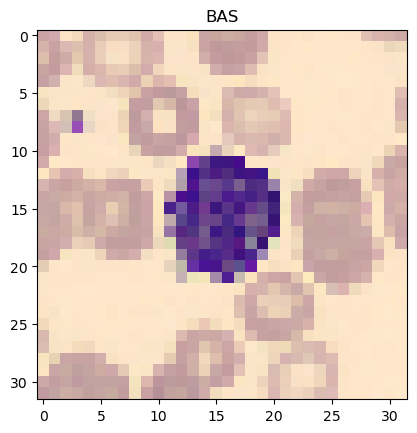

In [88]:
# Vérification que la transformation permet toujours d'afficher les images
plt.figure()
plt.imshow(X[3])
plt.title(Y_nameLabel[3])
plt.show()

## 5.2. Application d'un algorithme de Manifold learning : TSNE

In [89]:
# Reshape de l'array X en une dimension :
X_1D=X.reshape(17092,3072)
print(X_1D.shape)

# Pour contrôle :
print(Y_nameLabel.shape)
print(type(X_1D))
print(type(Y_nameLabel))

(17092, 3072)
(17092,)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [90]:
tsne = TSNE(n_components=2, method = 'barnes_hut', n_jobs=-1)
dataTSNE = tsne.fit_transform(X_1D)

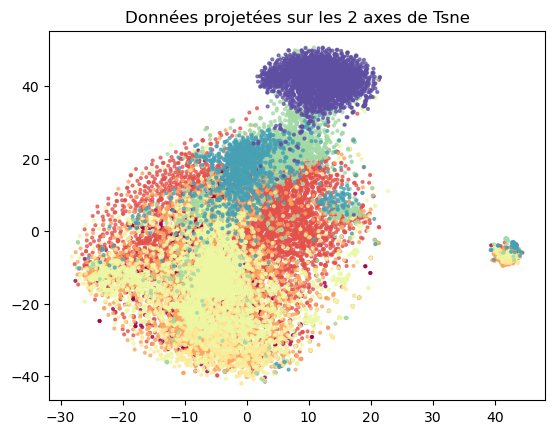

In [91]:
fig = plt.figure()

ax = fig.add_subplot(111)
ax.scatter(dataTSNE[:, 0], dataTSNE[:, 1],  c = df.label, cmap=plt.cm.Spectral, alpha = .7, s = 4)

ax.set_title("Données projetées sur les 2 axes de Tsne")
# ax.legend(loc='best')

plt.show()

## 5.4. Affichage des objets du Manifold sur la projection 2D TSNE

In [92]:
def plot_components(data, model, images=None, ax=None,
                    thumb_frac=0.05, cmap='gray_r', prefit = False):
    ax = ax or plt.gca()
    
    if not prefit :
        proj = model.fit_transform(data)
    else:
        proj = data
    ax.plot(proj[:, 0], proj[:, 1], '.b')
    
    if images is not None:
        min_dist_2 = (thumb_frac * max(proj.max(0) - proj.min(0))) ** 2
        shown_images = np.array([2 * proj.max(0)])
        for i in range(data.shape[0]):
            dist = np.sum((proj[i] - shown_images) ** 2, 1)
            if np.min(dist) < min_dist_2:
                # On ne montre pas le points trop proches
                continue
            shown_images = np.vstack([shown_images, proj[i]])
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(images[i], cmap=cmap),
                                      proj[i])
            ax.add_artist(imagebox)

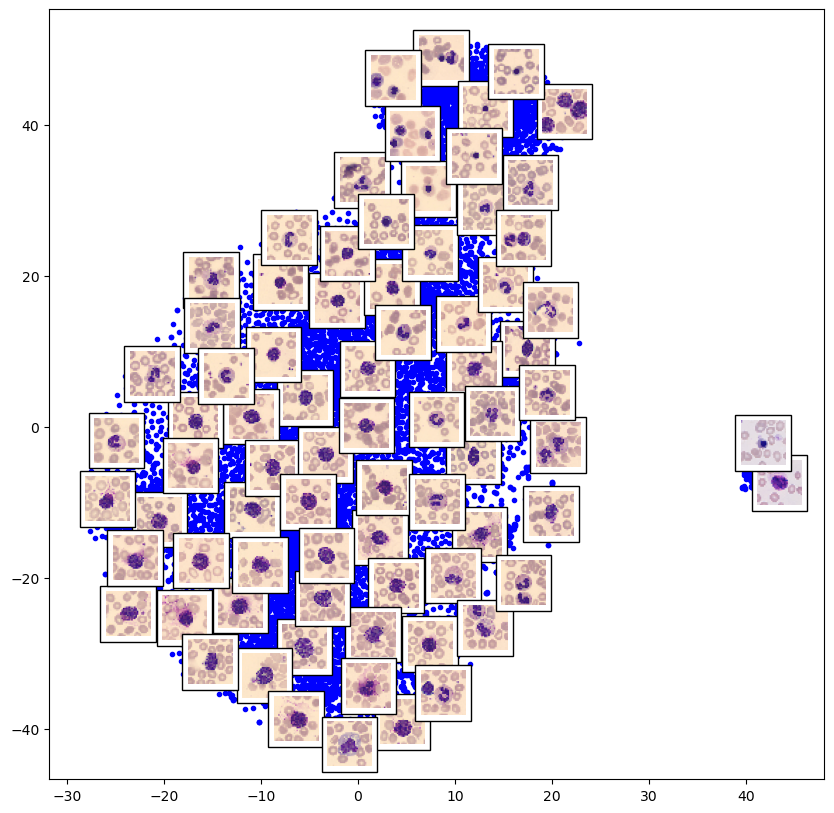

In [93]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
from matplotlib import offsetbox
from mpl_toolkits import mplot3d

fig, ax = plt.subplots(figsize=(10, 10))
plot_components(dataTSNE, tsne, images=X,
                ax=ax, thumb_frac=0.06, cmap='gray_r',prefit=True)